# Lecture 1.3: Exploratory Data Analysis

## Outline

* What is EDA?
* What are the common techniques used in EDA?
* Doing EDA in Python

## What is exploratory data analysis (EDA)?

* An approach/philosophy about how data analysis should be carried out
* Summarizes the main characteristics of the data
* often with visual methods
* Allows the data to reveal its underlying structure and model

A first *feel* for the data

Useful reference: "Exploratory Data Analysis", John Tukey, 1977.

## Objectives of EDA

* Suggest hypotheses about the causes of observed phenomena
* Assess assumptions on which inference is based
* Support selection of appropriate tools and techniques
* Provide basis for further data collection

## First, Clean the Data

* Dirtiness – does the data make sense?
* Missing data (imputation)
* Outliers / Anomalies
* Data type conversion
* Transforming
* Encoding, decoding, recoding
* Renaming variables
* Merging

## Common Numerical Techniques Used in EDA

* [Summary statistics](https://en.wikipedia.org/wiki/Summary_statistics)
* [Frequency table](https://en.wikipedia.org/wiki/Frequency_distribution)
* [Contingency table / cross tabulation](https://en.wikipedia.org/wiki/Contingency_table)

### Summary Statistics

* Measure of location/center, such as mean, median and mode
* Measure of variation, such as variance, standard deviation and inter-quartile range (IQR)
* Measure of the shape of the distribution, such as skewness and kurtosis
* measure of statistical dependence, such as correlation coefficient

### Frequency Table

* Displays the frequency of various outcomes in a sample
* Useful for summarizing single, categorical variable

<img src="images/frequency_table.png" width="350">

### Contingency Table

* displays the frequency distribution of more than one variable (the frequency table for multiple variables)
* Useful for summarizing multiple, categorical (or binned numerical) variables

<img src="images/contingency_table.png" width="500">

## Common Graphical Techniques

* Dot plot
* [Histogram](https://en.wikipedia.org/wiki/Histogram)
* [Box plot](https://en.wikipedia.org/wiki/Box_plot)
* [Scatter plot](https://en.wikipedia.org/wiki/Scatter_plot)
* [Bar chart](https://en.wikipedia.org/wiki/Bar_chart)
* [Heat map](https://en.wikipedia.org/wiki/Heat_map)

### Dot Plot

* Useful for displaying univariate (single variable) data with small size

<img src="images/dot_plot.png" width="400">

### Histogram

* One of the most commonly used plots for displaying univariate, numeric data
* Shows center, spread/variability, skewness and potential outliers
* Be careful of binning

<img src="images/hist1.png" width="600">

### Box Plot (Box-and-whisker Plot)

* Another most commonly used plot for displaying univariate, numeric data
* Shows minimum, 1st quartile (25th percentile), median, 3rd quartile (75th percentile), maximum and potential outliers
* Does not show distributional shape

<img src="images/boxplot.png" width="500">

Side-by-side box plot can be used to show the relationship between a numeric and a categorical variable

<img src="images/side_by_side_boxplot.png" width="500">

### Bar Chart

* Useful for displaying univariate, categorical data

<img src="images/barchart.png" width="700">

### Scatter Plot

* Useful for displaying the relationship between two numeric variables

<img src="images/scatterplot.png" width="700">

### Heat Map

* Useful for displaying the relationship between two categorical variables

<img src="images/heatmap.png" width="800">

## Let's do some EDA in Python

In [1]:
!conda install psycopg2 -y
!pip install ipython-sql

Using Anaconda Cloud api site https://api.anaconda.org
Fetching package metadata .......
Solving package specifications: ..........

# All requested packages already installed.
# packages in environment at /Users/alessandro/anaconda:
#
psycopg2                  2.6.1                    py35_1  


In [2]:
%load_ext sql

/Users/alessandro/anaconda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/Users/alessandro/anaconda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


`pylab` automatically imports numpy and matplotlib;  
`inline` tells Jupyter to plot figures in the notebook.  
`pandas` is a Python data analysis library.  
`yaml` lets us read [YAML](http://yaml.org/) files (which is how we store our credentials)

In [3]:
%pylab inline  
import pandas as pd
import yaml

Populating the interactive namespace from numpy and matplotlib


In [4]:
pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']
connection_string = 'postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds)

In [5]:
# Creates a connection to our Postgres database
%sql $connection_string

'Connected: student@postgres'

In [6]:
# loads the data from the cars table into a Pandas DataFrame
cars_table = %sql SELECT * FROM cars;
cars = cars_table.DataFrame()

398 rows affected.


Start with a very high level overview
- What do the first few rows look like?
- What are the different columns?
- Different data types
- Data summaries

In [7]:
cars.head()

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
index           398 non-null int64
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model           398 non-null object
origin          398 non-null object
car_name        398 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 31.2+ KB


In [9]:
cars.shape

(398, 10)

In [10]:
cars.describe()

/Users/alessandro/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,index,mpg,cylinders,displacement,horsepower,weight,acceleration
count,398.000000,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000
mean,198.500000,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090
std,115.036951,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689
min,0.000000,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,99.250000,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000
50%,198.500000,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000
75%,297.750000,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000
max,397.000000,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


Notice that pandas is unable to calculate quartile statistics for *horsepower* - why is that?

All the values that we can see look like numbers. If they were all numbers, Pandas should have figured out the correct data type---there must be something missing.

In [11]:
cars.count()

index           398
mpg             398
cylinders       398
displacement    398
horsepower      392
weight          398
acceleration    398
model           398
origin          398
car_name        398
dtype: int64

In [12]:
# Check out the bad values
cars.ix[cars.horsepower.isnull(),:]

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
392,32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
393,126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
394,330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
395,336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
396,354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
397,374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


In [13]:
# Reload the data, but skip rows where horsepower is NULL
cars_not_null = %sql SELECT * FROM cars WHERE horsepower IS NOT NULL;
cars = cars_not_null.DataFrame()
cars.info()

392 rows affected.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
index           392 non-null int64
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model           392 non-null object
origin          392 non-null object
car_name        392 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 30.7+ KB


In [14]:
# What about origin? model?
cars.origin.value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

In [15]:
cars['model'].value_counts()

73    40
78    36
76    34
82    30
75    30
79    29
70    29
72    28
77    28
81    28
80    27
71    27
74    26
Name: model, dtype: int64

In [16]:
# These should be strings
cars['origin'] = cars['origin'].astype(str)
cars['model'] = cars['model'].astype(str)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
index           392 non-null int64
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model           392 non-null object
origin          392 non-null object
car_name        392 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 30.7+ KB


Our data set has 5-6 numeric variables and 3-4 categorical variables (cylinders is kind of a wild card). Sometimes it is good to keep track of these:

In [17]:
num_vars = ['mpg','cylinders','displacement','horsepower','weight','acceleration']
cat_vars = ['model', 'origin', 'car_name']

## More Exploration

### Univariate-Numeric Viz

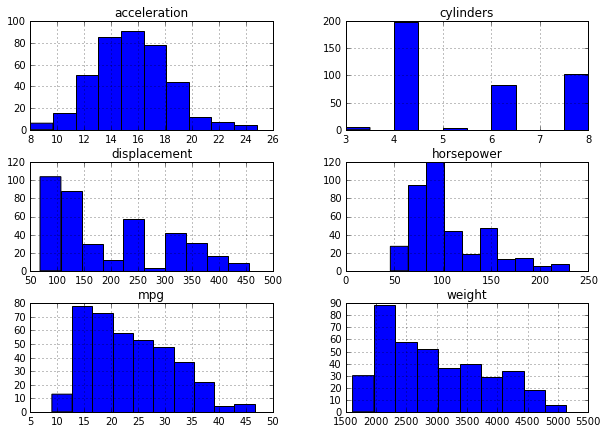

In [18]:
# Histograms
cars[num_vars].hist(bins=10, figsize=(10,7));

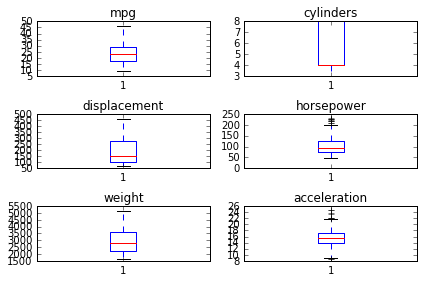

In [19]:
# Separate Boxplots
fig, axes = plt.subplots(3,2)
for ax, var in zip(axes.ravel(), num_vars):
    ax.boxplot(cars[var])
    ax.set_title(var)
plt.tight_layout()

### Univariate - Categorical

In [20]:
!conda install seaborn -y

Using Anaconda Cloud api site https://api.anaconda.org
Fetching package metadata .......
Solving package specifications: ..........

# All requested packages already installed.
# packages in environment at /Users/alessandro/anaconda:
#
seaborn                   0.7.1                    py35_0  


In [21]:
import seaborn as sns

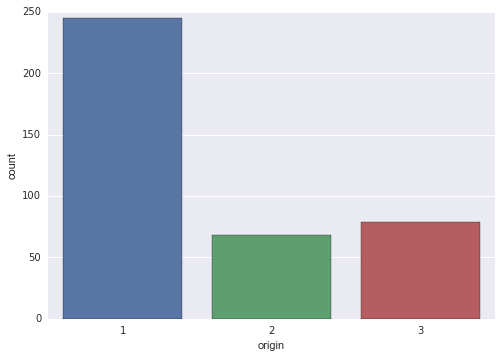

In [22]:
# Categorical
sns.countplot(x='origin', data=cars);

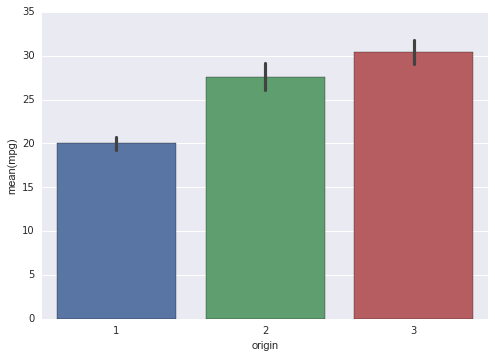

In [23]:
# Categorical vs Numeric
sns.barplot(x='origin', y='mpg', data=cars);

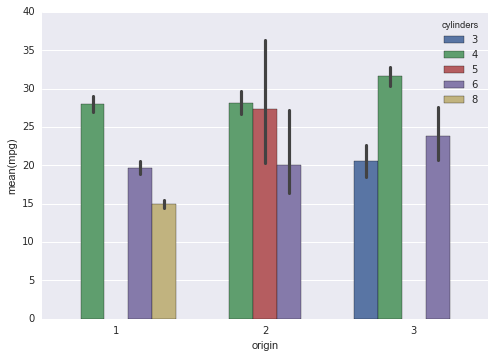

In [24]:
# Categorical vs categorical vs numeric
sns.barplot(x='origin', y='mpg', hue='cylinders', data=cars);

### Numeric vs Numeric

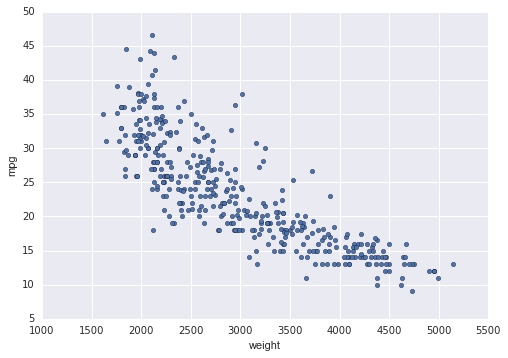

In [25]:
# Scatter plot
cars.plot('weight','mpg',kind='scatter');

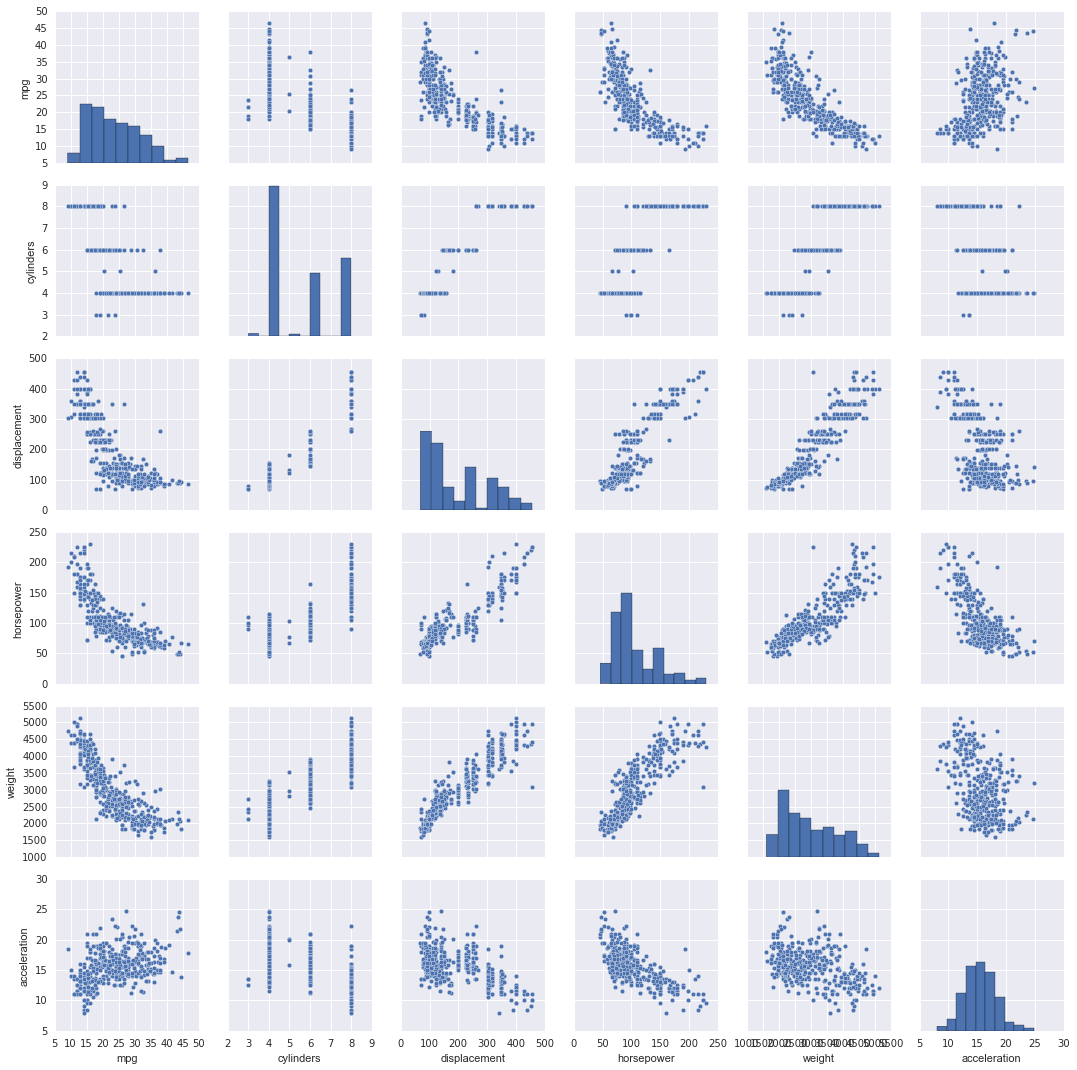

In [26]:
# Scatter plot matrix
sns.pairplot(cars[num_vars]);

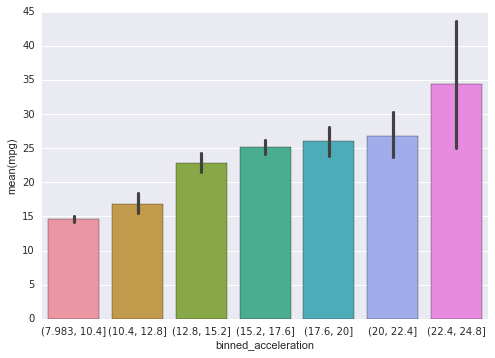

In [27]:
# Use binning to see relationships more clearly
cars['binned_acceleration'] = pd.cut(cars.acceleration, bins=7)
sns.barplot(x='binned_acceleration', y='mpg', data=cars);

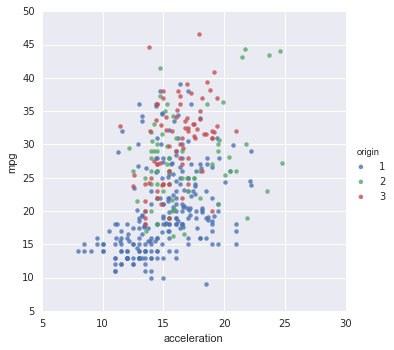

In [28]:
sns.lmplot(x='acceleration', y='mpg', hue='origin', data=cars, 
           fit_reg=False);

In [29]:
# Categorical vs Categorical
pd.crosstab(cars['origin'], cars['model'])

model,70,71,72,73,74,75,76,77,78,79,80,81,82
origin,,,,,,,,,,,,,
1,22,19,18,29,14,20,22,18,22,23,6,13,19
2,5,4,5,7,6,6,8,4,6,4,8,3,2
3,2,4,5,4,6,4,4,6,8,2,13,12,9


Aha! Model means model year --- we probably should have left this as numeric

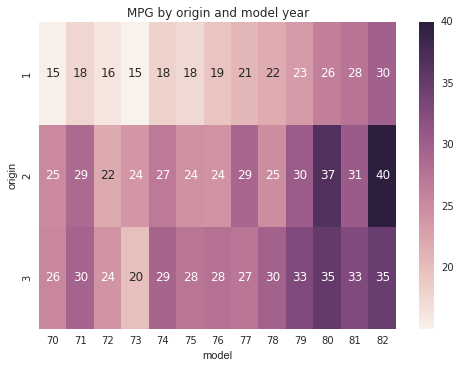

In [30]:
# Heat-map
agg = cars.groupby(['origin','model'])['mpg'].mean()
ax = sns.heatmap(agg.unstack(level='model'), annot=True)
ax.set_title('MPG by origin and model year');

See Seaborn's tutorial on [visualizing the distribution of a dataset](https://stanford.edu/~mwaskom/software/seaborn/tutorial/distributions.html) for more.